<h1 style="color: white; padding: 10px;">
    PEMODELAN REGRESI
</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline

In [2]:
data = 'C:/Users/LENOVO/Downloads/Data_UTPMSD1.csv'
df = pd.read_csv(data)
df.head()

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,1329536.0,323589.0,1627.0,82.00,26.06
1,1299699.0,329041.0,1521.0,82.12,26.92
2,1382905.0,339253.0,1476.0,82.72,26.27
3,1419128.0,348223.0,1557.0,83.00,26.08
4,1368074.0,337561.0,1339.0,82.46,26.31


STATISTIKA DESKRIPTIF

In [3]:
df.describe()

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


CEK MULTIKOLINEARITAS

<function matplotlib.pyplot.show(close=None, block=None)>

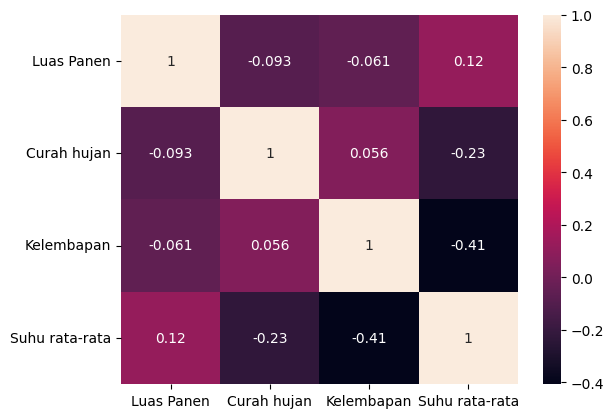

In [4]:
import seaborn as sns
from pprint import pprint

x = df.drop(df.columns[[0]], axis=1)
y = df.Produksi

corrmat = x.corr()
sns.heatmap(corrmat, annot=True)
plt.show

MEMBUAT MODEL REGRESI (DARI DATA TRAINING)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 0)

In [7]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [8]:
print('Model Coefficients: ')

for col, coef in zip(x.columns, lreg.coef_):
    print(f'{col}: {coef:0.4f}')

Model Coefficients: 
Luas Panen: 4.6113
Curah hujan: 34.4450
Kelembapan: -6803.7387
Suhu rata-rata: -65908.4458


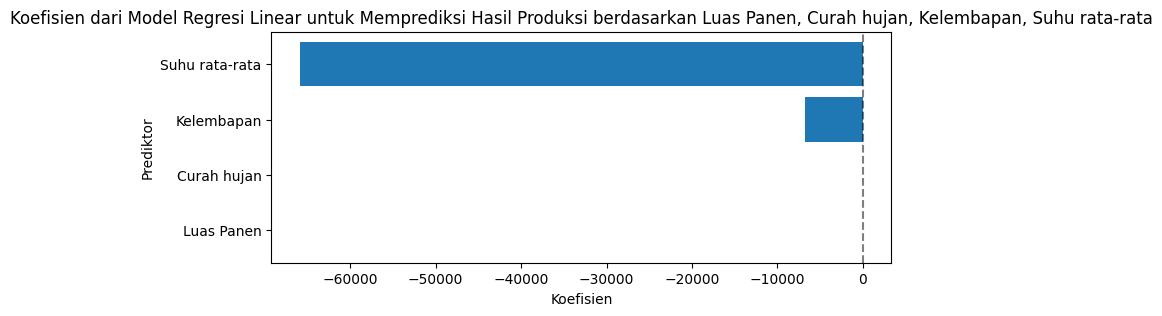

In [9]:
plt.figure(figsize=(8,3))
cols = x.columns
coefs = lreg.coef_

plt.barh(cols, coefs)
plt.axvline(0, c='k', ls='--', alpha=0.5)

plt.ylabel('Prediktor')
plt.xlabel('Koefisien')
plt.title('Koefisien dari Model Regresi Linear untuk Memprediksi Hasil Produksi berdasarkan Luas Panen, Curah hujan, Kelembapan, Suhu rata-rata')
plt.show()

EVALUASI MODEL

In [10]:
train_detkoef = lreg.score(x_train, y_train)
test_detkoef = lreg.score(x_test, y_test)
print("Train R2: ", train_detkoef)
print("Test R2: ", test_detkoef)

Train R2:  0.8014592878090888
Test R2:  0.9354072534064051


In [11]:
y_pred_train = lreg.predict(x_train)
MSE_train = mean_squared_error(y_train, y_pred_train)

y_pred_test = lreg.predict(x_test)
MSE_test = mean_squared_error(y_test, y_pred_test)

print('Trains MSE:', MSE_train)
print('Test MSE:', MSE_test)

Trains MSE: 274942372489.66504
Test MSE: 75014464878.46707
